In [1]:
import pandas as pd
from wordcloud import WordCloud
from pprint import pprint
import gensim


In [2]:
corpus = gensim.corpora.textcorpus.TextCorpus('yelp_labelled.txt')

In [3]:
yelp_reviews = pd.DataFrame([' '.join(doc) for doc in corpus.get_texts()], columns=['txt'])
 

In [4]:
yelp_reviews

,txt
0,wow loved place
1,crust good
2,tasty texture nasty
3,stopped late bank holiday rick steve recommend...
4,selection menu great prices
...,...
995,think food flavor texture lacking
996,appetite instantly gone
997,overall impressed
998,experience underwhelming think ninja sushi time


# Create Wordcloud

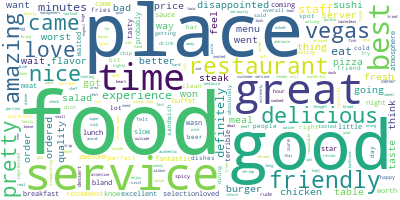

In [5]:
concatenated_docs = ', '.join(list(yelp_reviews['txt'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(concatenated_docs)
wordcloud.to_image()

# LDA

In [6]:
model = gensim.models.LdaModel(corpus, id2word=corpus.dictionary, num_topics=10)

In [7]:
for topic_id in range(model.num_topics):
    topk = model.show_topic(topic_id, 10)
    topk_words = [ w for w, _ in topk ]
    
    print('{}: {}'.format(topic_id, ' '.join(topk_words)))

0: food good service nice going sushi chicken real staff bad
1: place food best vegas good burger steak chicken worth definitely
2: place food great good service pretty experience time staff selection
3: service good place food great taste came time wait went
4: service place good food like restaurant delicious love pizza amazing
5: great service minutes place friendly food good pizza wasn took
6: food place bad stars service time like prices think zero
7: place food best definitely got buffet waited good restaurant great
8: service menu good won food restaurant time like disappointed hard
9: like place great time loved service love party times friend


In [8]:

pprint(model.print_topics())


[(0,
  '0.048*"food" + 0.037*"good" + 0.023*"service" + 0.010*"nice" + '
  '0.007*"going" + 0.007*"sushi" + 0.007*"chicken" + 0.007*"real" + '
  '0.007*"staff" + 0.007*"bad"'),
 (1,
  '0.024*"place" + 0.020*"food" + 0.011*"best" + 0.010*"vegas" + 0.009*"good" '
  '+ 0.008*"burger" + 0.008*"steak" + 0.008*"chicken" + 0.008*"worth" + '
  '0.008*"definitely"'),
 (2,
  '0.034*"place" + 0.028*"food" + 0.028*"great" + 0.020*"good" + '
  '0.012*"service" + 0.011*"pretty" + 0.011*"experience" + 0.011*"time" + '
  '0.009*"staff" + 0.009*"selection"'),
 (3,
  '0.025*"service" + 0.024*"good" + 0.020*"place" + 0.018*"food" + '
  '0.015*"great" + 0.012*"taste" + 0.009*"came" + 0.009*"time" + 0.009*"wait" '
  '+ 0.007*"went"'),
 (4,
  '0.016*"service" + 0.016*"place" + 0.016*"good" + 0.014*"food" + '
  '0.013*"like" + 0.011*"restaurant" + 0.011*"delicious" + 0.010*"love" + '
  '0.007*"pizza" + 0.007*"amazing"'),
 (5,
  '0.027*"great" + 0.018*"service" + 0.016*"minutes" + 0.015*"place" + '
  '0.015*"